# FYP Assignment 3 - Data Preprocessing

Exploratory data analysis, visualization, and preprocessing of Zheng's energy consumption dataset.

## Reading Data

In [4]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Read entire dataset at once as a dataframe - 167 MB so this isn't intractable
data = pd.read_csv('./data.csv')

## Exploratory Data Analysis

### Overview of `DataFrame`

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42372 entries, 0 to 42371
Columns: 1036 entries, CONS_NO to 2016/9/9
dtypes: float64(1034), int64(1), object(1)
memory usage: 334.9+ MB


### Statistical summary of numerical columns

In [13]:
# Save the description into a new dataframe to index counts for visualizing missing values
description_df = data.describe()

In [14]:
# Echo the dataframe
description_df

,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
count,42372.000000,25870.000000,25912.000000,25911.000000,25912.00000,25912.000000,25912.000000,25915.000000,25924.000000,25925.000000,...,40544.000000,41482.000000,41915.000000,41151.000000,41906.000000,41873.000000,41850.000000,41967.000000,42044.000000,42027.00000
mean,0.085316,7.168735,6.954202,6.784099,7.08430,10.516470,7.219633,7.341512,7.160004,6.839875,...,8.836129,9.304656,10.758718,9.942215,11.173498,11.482926,11.656425,11.322680,11.015589,10.69165
std,0.279354,34.131237,40.017856,38.327058,31.98716,576.388348,34.703617,36.569049,36.916957,30.235396,...,52.371956,57.063621,88.039832,62.010381,94.267851,100.971180,118.369381,103.891111,100.614909,107.25814
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.660000,0.820000,0.880000,0.880000,0.900000,0.920000,0.940000,0.910000,0.910000,0.90000
50%,0.000000,3.310000,2.870000,2.900000,3.35000,3.440000,3.295000,3.470000,3.130000,3.250000,...,4.380000,4.670000,5.010000,4.820000,5.150000,5.110000,5.190000,5.110000,5.020000,4.93000
75%,0.000000,8.910000,8.170000,8.210000,8.76000,8.620000,8.740000,8.900000,8.780000,8.520000,...,9.300000,9.380000,10.740000,9.700000,11.380000,11.430000,11.600000,11.300000,10.730000,10.28000
max,1.000000,3318.000000,3966.000000,4392.000000,3414.00000,92713.900000,3167.000000,3960.000000,3654.000000,3306.000000,...,6324.000000,6990.000000,14640.000000,6672.000000,16320.000000,17100.000000,21210.000000,17940.000000,16710.000000,18570.00000


### Visualizing Missing Values
Since there are more than 1,000 columns in the dataset, using a dataframe is not the

In [48]:
# Extract counts for all dates - this will then be plotted to visualize missing values
value_counts = data.describe().loc['count'].drop('FLAG')

In [49]:
# Will use this to create dotted line at 42,372 in plot
max_threshold = np.ones(len(value_counts)) * np.max(value_counts)

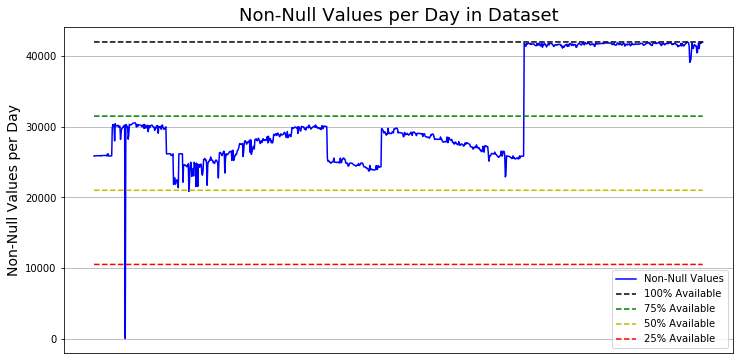

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(value_counts, 'b-', label='Non-Null Values')
plt.plot(max_threshold, 'k--', label='100% Available')
plt.plot(0.75 * max_threshold, 'g--', label='75% Available')
plt.plot(0.50 * max_threshold, 'y--', label='50% Available')
plt.plot(0.25 * max_threshold, 'r--', label='25% Available')
plt.xticks([]) # Do not want indices or dates for now
plt.ylabel('Non-Null Values per Day', fontsize=14)
plt.title('Non-Null Values per Day in Dataset', fontsize=18)
plt.grid(); plt.legend()

There is clearly one day when the number of non-null values drop to ~0. This day should be dropped from the data unless we can figure out how to fill in these missing values using data from previous and next days.

On most days, the number of non-null values in the dataset are between 50% and 75% of the actual number of rows in the dataset. Complete set of readings is onl available towards the end of the dataset i.e in 2016.

In [71]:
# Minimum number of non-null kW readings recorded on a day
min_readings = np.min(value_counts)
max_readings = np.max(value_counts)
idx_min = np.argmin(value_counts)

In [72]:
# What is the date of the day with the 
idx_min

'2014/10/3'

In [73]:
data[[idx_min]].describe()

,2014/10/3
count,15.000000
mean,484.908667
std,772.293554
min,15.300000
25%,50.300000
50%,144.000000
75%,334.500000
max,2463.000000


### First 5 rows

In [6]:
# What do the first 5 rows in the dataset look like?
data.head()

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


Lots of `NaN`s or missing values for the first 3 consumers. Also, the dates don't look entirely sequential: there is a jump from 1/1/2014 to 10/1/2014. The format of the dates is also very awkward - `YYYY/MM/DD`. 

Consumer number is an irrelevant column. Should be dropped. 

`FLAG` column is our **target** - this is what we will be trying to predict.

Need to systematically visualize or identify proportion of `NaN`s in this dataset. Lots of missing values. 

### What about the last 5 rows?

In [4]:
data.tail()

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
42367,F1472871E1AFF49D4289564B6377D76C,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.25,3.56,3.38,4.39,3.72,3.77,3.96,3.64,3.40,4.38
42368,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,2.70,4.39,3.95,0.0,0.00,0.00,0.00,0.00,...,4.81,4.87,4.48,3.67,3.31,4.58,3.33,3.19,4.57,4.00
42369,A9A0FE83467A680FBFB0DBFC910DF227,0,0.58,0.84,1.61,0.9,0.60,0.82,0.89,0.03,...,NaN,0.66,2.92,2.36,3.86,4.28,3.37,6.67,2.44,1.15
42370,D9A6ADA018FA46A55D5438370456AA45,0,16.89,13.84,13.50,14.6,14.46,12.34,15.37,17.01,...,21.13,13.75,22.61,18.83,25.52,18.11,19.31,17.48,17.20,15.28
42371,F3406636BAD1E6E0826E8EDDC9A1BF00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.80,4.45,9.80,5.11,16.69,12.04,9.90,8.23,8.56,9.86


### Distribution of non-null values based on consumer type

Do regular consumers have fewer missing values than thieves?

In [83]:
# Count non-null values in each column based on FLAG column value
grouped_by_flag = data.groupby('FLAG').count()
grouped_by_flag

,CONS_NO,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
FLAG,,,,,,,,,,,,,,,,,,,,,
0,38757,23742,23773,23773,23773,23772,23774,23778,23781,23782,...,37121,38025,38413,37674,38403,38374,38341,38459,38544,38526
1,3615,2128,2139,2138,2139,2140,2138,2137,2143,2143,...,3423,3457,3502,3477,3503,3499,3509,3508,3500,3501


In [102]:
grouped_by_flag[['CONS_NO']]

,CONS_NO
FLAG,
0,38757
1,3615


In [140]:
print("%age distribution of classes\nb")
print(grouped_by_flag[['CONS_NO']]/len(data[['CONS_NO']]))

%age distribution of classes

       CONS_NO
FLAG          
0     0.914684
1     0.085316


In [149]:
91.5  + 8.5 

100.0

Text(0.5, 1.0, 'Class Distribution')

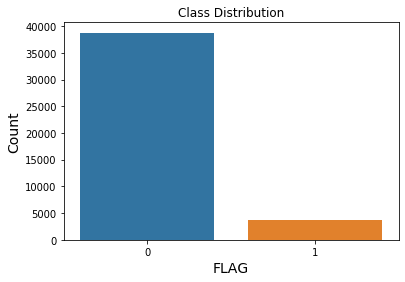

In [133]:
sns.countplot(x='FLAG', data=data)
plt.xlabel('FLAG', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Class Distribution')

This is an unbalanced classification problem - there is a 91.5-8.5% split between negative and positive (target) class in the dataset.

### Visualizing Missing Values per Category

In [141]:
grouped_by_flag.head()

,CONS_NO,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
FLAG,,,,,,,,,,,,,,,,,,,,,
0,38757,23742,23773,23773,23773,23772,23774,23778,23781,23782,...,37121,38025,38413,37674,38403,38374,38341,38459,38544,38526
1,3615,2128,2139,2138,2139,2140,2138,2137,2143,2143,...,3423,3457,3502,3477,3503,3499,3509,3508,3500,3501


In [147]:
# Get regular consumer's non-null values
reg_non_null_counts = grouped_by_flag.iloc[0, 1:]
thieves_non_null_counts = grouped_by_flag.iloc[1, 1:]

In [148]:
plt.plot(reg_non_null_counts, 'k--', )

pandas.core.series.Series